# 01. 표기법과 데이터

## 1.1 표기법

두 가지 표기법을 병행해 사용.
첫번째는 순서하게 머신러닝적인 표기법, 두번째는 가격 데이터로부터 계산된 이산 수익률을 사용

## 1.2 데이터셋

재생산성을 위해 이 책에서는 다음의 링크(https://github.com/shokru/mlfactor.github.io/tree/master/material)에서 구할 수 있는 단 하나의 금융 데이터셋만을 사용해 파이썬 구현에 대한 예제를 제시

현재 프로젝트에서는 `data/external/` 폴더에 저장.

### 데이터 셋 특징

1. 시간: 1998년 11월 ~ 2019년 03월
2. 각 시점에 대해 총 93개의 특성이 표본에 포함된 기업들을 설명
3. 벨류에이션, 수익성, 퀄리티(ROE), 모멘텀, 기술적 분석, 리스크, 추정치(EPS), 거래량, 유동성 등을 포함

In [3]:
import pandas as pd

data_raw = pd.read_excel("../data/external/data_ml.xlsx")  # 데이터 불러오기
idx_data = data_raw.index[
    (data_raw["date"] > "1999-12-31") & (data_raw["date"] < "2019-01-01")
].tolist()
# 날짜를 받기 위한 인덱스 생성
# df.iloc[행_위치, 열_위치]: 특정 행과 열의 위치를 숫자로 지정하여 데이터를 선택하는 함수
data_ml = data_raw.iloc[idx_data]

# 날짜 인덱스에 따라 데이터셋 필터링
data_ml.iloc[0:6, 0:6]  # 예시 출력

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover
0,13,2006-12-31,0.25,0.33,0.27,0.22
1,13,2007-01-31,0.25,0.32,0.28,0.22
2,13,2007-02-28,0.26,0.30,0.30,0.22
3,17,2015-03-31,0.73,0.64,0.70,0.40
4,17,2015-04-30,0.72,0.62,0.66,0.40
5,17,2015-05-31,0.71,0.63,0.64,0.40


Text(0, 0.5, 'nb_assets')

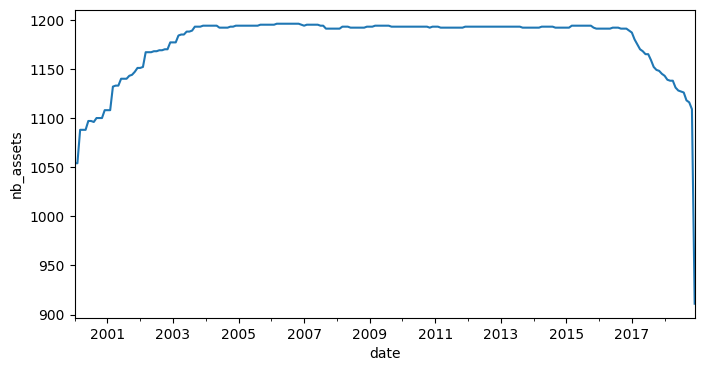

In [4]:
import matplotlib.pyplot as plt

# 각 날짜별 자산 개수 세기(date를 기준으로 groupby)
pd.Series(data_ml.groupby("date").size()).plot(figsize=(8, 4))

# y축 제목 추가한 후 그래프 그리기
plt.ylabel("nb_assets")

## 데이터 셋 구조

현재 데이터셋에는 4개의 레이블 존재.
1. R1M_Usd: 1개월의 미래수익률
2. R3M_Usd: 3개월의 미래수익률
3. R6M_Usd: 6개월의 미래수익률
4. R12M_Usd: 12개월의 미래수익률

여기서 수익률은 **총 수익률(주가 수익률 + 배당 수익률)**을 의미.

Text(0, 0.5, 'count')

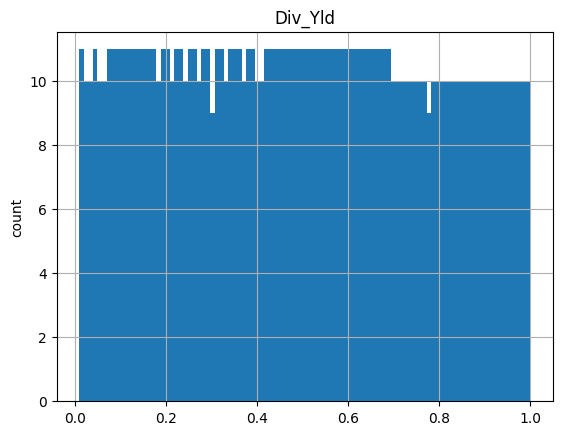

In [ ]:
features = list(data_ml.iloc[:, 3:95].columns)

# 특성의 열 이름을 저장해놓는다(하드 코딩되어 있으니 주의할 것).
features_short = [
    "Div_Yld",
    "Eps",
    "Mkt_Cap_12M_Usd",
    "Mom_11M_Usd",
    "Ocf",
    "Pb",
    "Vol1Y_Usd",
]

col_feat_Div_Yld = data_ml.columns.get_loc("Div_Yld")

# 특성 Div_Yld 열의 위치 찾기
is_custom_date = data_ml["date"] == "2000-02-29"

# 필터링할 부울 인덱스 생성
# 해당 날짜의 배당 수익률 특성 분포
data_ml[is_custom_date].iloc[:, [col_feat_Div_Yld]].hist(bins=100)

# 히스토그램 사용하기
plt.ylabel("count")

'매수', '매도', '유지'와 같은 범주를 예측할 때는 수치형 레이블이 아닌 범주형 레이블을 추가로 생성할 필요가 있음.

In [6]:
# 임시 데이터프레임을 위한 빈 리스트 생성
df_median = []
df = []

import numpy as np

df_median = (
    data_ml[["date", "R1M_Usd", "R12M_Usd"]].groupby(["date"]).median()
)  # 각 날짜별로 2개의 레이블에 대한 중간 값 계산
df_median.rename(
    columns={"R1M_Usd": "R1M_Usd_median", "R12M_Usd": "R12M_Usd_median"}, inplace=True
)
df = pd.merge(data_ml, df_median, how="left", on=["date"])

# 데이터프레임 합치기
data_ml["R1M_Usd_C"] = np.where(
    df["R1M_Usd"] > df["R1M_Usd_median"], 1.0, 1.0
)  # 범주형 레이블 생성
data_ml["R12M_Usd_C"] = np.where(
    df["R12M_Usd"] > df["R12M_Usd_median"], 1.0, 1.0
)  # 범주형 레이블 생성

C:\Users\kims0\AppData\Local\Temp\ipykernel_6680\1992282641.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ml["R1M_Usd_C"] = np.where(
C:\Users\kims0\AppData\Local\Temp\ipykernel_6680\1992282641.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ml["R12M_Usd_C"] = np.where(


위에서 생성한 레이블은 이진 변수이며, 1(참), 0(거짓)으로 구성.

In [7]:
seperation_date = "2014-01-15"

idx_train = data_ml.index[(data_ml["date"] < seperation_date)].tolist()
idx_test = data_ml.index[(data_ml["date"] >= seperation_date)].tolist()

In [9]:
# 임시 데이터프레임을 위한 빈 리스트 생성
stock_ids_short = []
stock_days = []

stock_ids = data_ml["stock_id"].unique()  # 모든 stock_ids의 리스트
stock_days = (
    data_ml[["date", "stock_id"]].groupby(["stock_id"]).count().reset_index()
)  # 각 주식별 데이터 포인트 개수 세기

stock_ids_short = stock_days.loc[stock_days["date"] == (stock_days["date"].max())]

# 데이터가 전부 있는 주식을
stock_ids_short = stock_ids_short["stock_id"].unique()

# 리스트로 반환
is_stock_ids_short = data_ml["stock_id"].isin(stock_ids_short)
returns = data_ml[is_stock_ids_short].pivot(
    index="date", columns="stock_id", values="R1M_Usd"
)  # 수익률 행렬

returns.head()

stock_id,1,3,4,7,9,11,12,16,17,18,...,1199,1200,1201,1202,1203,1204,1208,1209,1210,1212
date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,-0.036,0.077,-0.016,-0.009,0.032,0.144,-0.110,-0.191,-0.103,0.098,...,-0.509,0.039,-0.011,-0.019,0.168,0.080,-0.372,-0.560,-0.006,-0.186
2000-02-29,0.263,-0.024,0.000,0.027,0.076,0.258,0.110,0.197,-0.053,-0.001,...,-0.147,0.017,-0.148,0.118,0.177,0.161,0.143,-0.102,-0.057,0.104
2000-03-31,0.031,0.018,0.153,0.000,-0.025,0.049,0.134,-0.030,0.074,-0.002,...,0.083,0.006,-0.025,-0.009,0.237,-0.008,0.057,0.144,0.085,-0.143
2000-04-30,0.448,0.027,-0.011,-0.017,-0.022,0.014,0.022,0.161,0.051,-0.037,...,-0.192,0.003,-0.061,0.053,-0.097,-0.114,0.070,-0.103,0.073,0.204
2000-05-31,-0.097,0.050,0.014,0.018,-0.121,-0.116,-0.038,-0.020,0.038,-0.131,...,-0.279,0.014,0.118,0.089,-0.023,-0.089,-0.137,0.113,0.016,0.042
